In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
print("Hello")

Hello


In [ ]:
depression = pd.read_csv("/content/sample_data/Mental-Health-Twitter.csv")
df = depression.copy()
print("done")

done


In [ ]:
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    20000 non-null  int64 
 1   post_id       20000 non-null  int64 
 2   post_created  20000 non-null  object
 3   post_text     20000 non-null  object
 4   user_id       20000 non-null  int64 
 5   followers     20000 non-null  int64 
 6   friends       20000 non-null  int64 
 7   favourites    20000 non-null  int64 
 8   statuses      20000 non-null  int64 
 9   retweets      20000 non-null  int64 
 10  label         20000 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.7+ MB


In [ ]:
#CHECKING NAN VALUES
df.isna().any()

Unnamed: 0      False
post_id         False
post_created    False
post_text       False
user_id         False
followers       False
friends         False
favourites      False
statuses        False
retweets        False
label           False
dtype: bool

In [ ]:
#Removing the 3 columns
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("post_id", axis=1, inplace=True)
df.drop("user_id", axis=1, inplace=True)

In [ ]:
df.head()


,post_created,post_text,followers,friends,favourites,statuses,retweets,label
0,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1
1,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1
2,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1
3,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1
4,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1


In [ ]:
# df.corr()

In [ ]:
#datetime object
df.post_created=df.post_created.apply(pd.to_datetime)

df["month"]=df.post_created.dt.month
df["year"]=df.post_created.dt.year

df.drop("post_created", axis=1, inplace=True)


In [ ]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year
0,It's just over 2 years since I was diagnosed w...,84,211,251,837,0,1,8,2015
1,"It's Sunday, I need a break, so I'm planning t...",84,211,251,837,1,1,8,2015
2,Awake but tired. I need to sleep but my brain ...,84,211,251,837,0,1,8,2015
3,RT @SewHQ: #Retro bears make perfect gifts and...,84,211,251,837,2,1,8,2015
4,It’s hard to say whether packing lists are mak...,84,211,251,837,1,1,8,2015


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
followers,20000.0,900.48395,1899.913961,0.0,177.0,476.0,1197.0,28614.0
friends,20000.0,782.42875,1834.817945,0.0,211.0,561.0,701.0,28514.0
favourites,20000.0,6398.23555,8393.072914,0.0,243.0,2752.0,8229.0,39008.0
statuses,20000.0,44394.41960,140778.519201,3.0,5129.0,13251.0,52892.0,1063601.0
retweets,20000.0,1437.92730,15119.665118,0.0,0.0,0.0,1.0,839540.0
label,20000.0,0.50000,0.500013,0.0,0.0,0.5,1.0,1.0
month,20000.0,6.71135,4.735351,1.0,1.0,8.0,12.0,12.0
year,20000.0,2015.48595,1.485434,2009.0,2015.0,2016.0,2016.0,2017.0


In [ ]:
!pip install textblob
!pip install nltk 

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Converting to lowercase
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
#Removing numerical values 
df["post_text"] = df["post_text"].str.replace("\d","")

<ipython-input-14-72213b60cd0f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["post_text"] = df["post_text"].str.replace("\d","")


In [ ]:
#Removing punctations
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

<ipython-input-15-7a5d48acfdcb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["post_text"] = df["post_text"].str.replace("[^\w\s]","")


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# from nltk.tokenize import word_tokenize
# df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

In [ ]:
df["frequency"] = df["post_text"].apply(lambda x: len(str(x).split(" "))) 

In [ ]:
df.groupby("frequency").max()
df[df["post_text"].str.contains("sos unique")]
longest_comment=df.iloc[3038,0]
print(longest_comment)

rt sos unique new york unique new york unique new york unique new york unique new york unique new york unique new york unique new york u


In [ ]:
 nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
TextBlob(longest_comment).tags

[('rt', 'NN'),
 ('sos', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('unique', 'JJ'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('u', 'NN')]

In [ ]:
df.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,"[years, since, diagnosed, anxiety, depression,...",14
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,"[sunday, need, break, im, planning, spend, lit...",9
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",16
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,"[hard, say, whether, packing, lists, making, l...",14


In [ ]:
# !pip install textblob 
# from textblob import TextBlob

In [ ]:
blob_emptyline2 = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment
    blob_emptyline2.append(blob)

In [ ]:
df_blob2 = pd.DataFrame(blob_emptyline2)

In [ ]:
df_blob3 = pd.concat([df.reset_index(drop=True), df_blob2], axis=1)
df_blob3.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,polarity,subjectivity
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,"[years, since, diagnosed, anxiety, depression,...",14,0.100000,1.000000
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,"[sunday, need, break, im, planning, spend, lit...",9,-0.093750,0.750000
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6,-0.400000,0.700000
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",16,0.900000,0.875000
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,"[hard, say, whether, packing, lists, making, l...",14,-0.045833,0.370833


In [ ]:
df_blob3["Sentiment"] =  np.where(df_blob3["polarity"] >= 0 , "Positive", "Negative")

In [ ]:
df_blob3.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,polarity,subjectivity,Sentiment
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,"[years, since, diagnosed, anxiety, depression,...",14,0.100000,1.000000,Positive
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,"[sunday, need, break, im, planning, spend, lit...",9,-0.093750,0.750000,Negative
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6,-0.400000,0.700000,Negative
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",16,0.900000,0.875000,Positive
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,"[hard, say, whether, packing, lists, making, l...",14,-0.045833,0.370833,Negative


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df_blob3['Sentiment']=encoder.fit_transform(df_blob3['Sentiment'])

In [ ]:
df_blob3.head()

,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,polarity,subjectivity,Sentiment
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,"[years, since, diagnosed, anxiety, depression,...",14,0.100000,1.000000,1
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,"[sunday, need, break, im, planning, spend, lit...",9,-0.093750,0.750000,0
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,"[awake, tired, need, sleep, brain, ideas]",6,-0.400000,0.700000,0
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,"[rt, sewhq, retro, bears, make, perfect, gifts...",16,0.900000,0.875000,1
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,"[hard, say, whether, packing, lists, making, l...",14,-0.045833,0.370833,0


In [ ]:
df_blob3["tokens"] = df_blob3["tokens"].apply(lambda x: " ".join(x))


In [ ]:
df_blob3.head()


,post_text,followers,friends,favourites,statuses,retweets,label,month,year,tokens,frequency,polarity,subjectivity,Sentiment
0,years since diagnosed anxiety depression today...,84,211,251,837,0,1,8,2015,years since diagnosed anxiety depression today...,14,0.100000,1.000000,1
1,sunday need break im planning spend little tim...,84,211,251,837,1,1,8,2015,sunday need break im planning spend little tim...,9,-0.093750,0.750000,0
2,awake tired need sleep brain ideas,84,211,251,837,0,1,8,2015,awake tired need sleep brain ideas,6,-0.400000,0.700000,0
3,rt sewhq retro bears make perfect gifts great ...,84,211,251,837,2,1,8,2015,rt sewhq retro bears make perfect gifts great ...,16,0.900000,0.875000,1
4,hard say whether packing lists making life eas...,84,211,251,837,1,1,8,2015,hard say whether packing lists making life eas...,14,-0.045833,0.370833,0


In [ ]:
#Checking which words are used most for negative sentiments
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

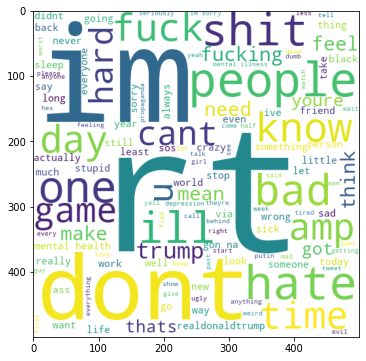

In [ ]:
negative_wc = wc.generate(df_blob3[df_blob3['Sentiment'] == 0]['tokens'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [ ]:
#Text Vectorization 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df_blob3['tokens']).toarray()

In [ ]:
X.shape

(20000, 3000)

In [ ]:
y = df_blob3['Sentiment'].values

In [ ]:
y

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.4285
[[ 593  121]
 [2165 1121]]
0.9025764895330113


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.87025
[[ 203  511]
 [   8 3278]]
0.8651359197677487


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.89925
[[ 439  275]
 [ 128 3158]]
0.9198951354500436


In [ ]:
# Bnb tfidf

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
train_classifier(etc,X_train,y_train,X_test,y_test)


(0.937, 0.9636308068459658)

In [ ]:
train_classifier(gbdt,X_train,y_train,X_test,y_test)


(0.855, 0.8551181102362204)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.93775
Precision -  0.9418097177771312
For  KN
Accuracy -  0.8475
Precision -  0.8452012383900929
For  NB
Accuracy -  0.87025
Precision -  0.8651359197677487
For  DT
Accuracy -  0.84725
Precision -  0.8474928552870875
For  LR
Accuracy -  0.935
Precision -  0.9380428488708743
For  RF
Accuracy -  0.92975
Precision -  0.9518796992481203
For  ETC
Accuracy -  0.937
Precision -  0.9636308068459658
For  GBDT
Accuracy -  0.855
Precision -  0.8551181102362204
For  xgb
Accuracy -  0.84775
Precision -  0.8463130659767141


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [ ]:
performance_df

,Algorithm,Accuracy,Precision
6,ETC,0.93700,0.963631
5,RF,0.92975,0.951880
0,SVC,0.93775,0.941810
4,LR,0.93500,0.938043
2,NB,0.87025,0.865136
7,GBDT,0.85500,0.855118
3,DT,0.84725,0.847493
8,xgb,0.84775,0.846313
1,KN,0.84750,0.845201


In [ ]:
#ETC SELECTED AS OUR MODEL WITH 93% Accuracy and 96%precision
#RF 92% accuracy & 95%precision

In [ ]:
etc.fit(X_train,y_train)
y_pred = etc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.937
[[ 595  119]
 [ 133 3153]]
0.9636308068459658


In [ ]:
# import pickle
# pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(etc,open('model.pkl','wb'))
